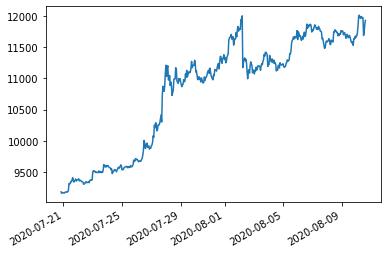

In [ ]:
import requests        
import json            
import pandas as pd    
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt     
    
import datetime as dt 

def get_bars(symbol, interval = '1h'):
   root_url = 'https://api.binance.com/api/v1/klines'
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

steemeth = get_bars('BTCUSDT')
btc = steemeth['o'].astype('float') 

btc.plot()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
new = np.log(btc).diff().dropna()


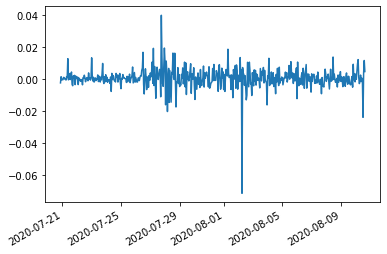

In [ ]:
new.plot()

In [ ]:
adfuller(new)

(-17.634947798182722,
 3.7827686334003566e-30,
 1,
 497,
 {'1%': -3.4435761493506294,
  '10%': -2.5698767442886696,
  '5%': -2.867372960189225},
 -3476.9987856910657)

In [ ]:
#Fit the model
mod_kns = sm.tsa.MarkovRegression(new.dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encount

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      o   No. Observations:                  499
Model:               MarkovRegression   Log Likelihood                1954.232
Date:                Mon, 10 Aug 2020   AIC                          -3890.464
Time:                        15:38:12   BIC                          -3852.551
Sample:                    07-20-2020   HQIC                         -3875.586
                         - 08-10-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.697e-06   7.76e-07      6.053      0.000    3.18e-06    6.22e-06
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.992e-05   5.83e-06      6.854      0.000    2.85e-05    5.13e-05
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012      0.001      1.250      0.211      -0.001       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9028      0.036     25.305      0.000       0.833       0.973
p[1->0]        0.0697      0.025      2.817      0.005       0.021       0.118
p[2->0]     2.301e-13        nan        nan        nan         nan         nan
p[0->1]        0.0917      0.028      3.268      0.001       0.037       0.147
p[1->1]        0.9101      0.028     32.642      0.000       0.855       0.965
p[2->1]        1.0000      0.345      2.898      0.004       0.324       1.676
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
pred = pd.Series(res_kns.fittedvalues,copy = True)
print(pred.head())

2020-07-20 20:59:59.999    0.0
2020-07-20 21:59:59.999    0.0
2020-07-20 22:59:59.999    0.0
2020-07-20 23:59:59.999    0.0
2020-07-21 00:59:59.999    0.0
dtype: float64


In [ ]:
pred.cumsum()

2020-07-20 20:59:59.999    0.0
2020-07-20 21:59:59.999    0.0
2020-07-20 22:59:59.999    0.0
2020-07-20 23:59:59.999    0.0
2020-07-21 00:59:59.999    0.0
                          ... 
2020-08-10 10:59:59.999    0.0
2020-08-10 11:59:59.999    0.0
2020-08-10 12:59:59.999    0.0
2020-08-10 13:59:59.999    0.0
2020-08-10 14:59:59.999    0.0
Length: 499, dtype: float64